In [5]:
%pip install networkx pandas matplotlib seaborn

  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/eb/8d/776adee7bbf76365fdd7f2552710282c79a4ead5d2a46408c9043a2b70ba/networkx-3.5-py3-none-any.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/86/41/585a168330ff063014880a80d744219dbf1dd7a1c706e75ab3425a987384/pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/31/3c/80816f027b3a4a28cd2a0a6ef7f89a2db22310e945cd886ec25bfb399221/matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/3d/a8/566578b10d8d0e9955b1b6cd5db4e9d4592dd0026a941ff7994cedda030a/numpy-2.3.4-cp3


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### import libraries   

In [25]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx.algorithms.community as nx_comm

#### # --- Bước 1: Đọc dữ liệu và xác định kiểu đồ thị ---

In [7]:
# nx.read_edgelist có thể đọc file .gz trực tiếp
# create_using=nx.Graph() chỉ định đây là đồ thị KHÔNG có hướng.
# Đây là "Kiểu đồ thị" 
G = nx.read_edgelist('facebook_combined.txt.gz', create_using=nx.Graph(), nodetype=int)

## PHÂN TÍCH TỔNG QUAN MẠNG

#### # --- Bước 2: Các thuộc tính cơ bản ---

In [8]:
# Số lượng nút và cạnh 
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Số lượng nút (N): {num_nodes}")
print(f"Số lượng cạnh (E): {num_edges}")

Số lượng nút (N): 4039
Số lượng cạnh (E): 88234


In [9]:
# Kiểm tra kiểu đồ thị 
print(f"Đồ thị có hướng: {G.is_directed()}")
print(f"Đồ thị có trọng số: {nx.is_weighted(G)}")

Đồ thị có hướng: False
Đồ thị có trọng số: False


In [10]:
# Mật độ đồ thị (Density)
density = nx.density(G)
print(f"Mật độ đồ thị: {density:.6f}")

Mật độ đồ thị: 0.010820


#### # --- Bước 3: Tính toán các độ đo ---

In [11]:
# Kiểm tra tính liên thông (cần cho đường kính/bán kính)
if nx.is_connected(G):
    print("Đồ thị liên thông.")
    # Đường kính (Diameter) 
    diameter = nx.diameter(G)
    print(f"Đường kính: {diameter}")
    
    # Bán kính (Radius) 
    radius = nx.radius(G)
    print(f"Bán kính: {radius}")
    
    # Độ dài đường đi trung bình 
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"Độ dài đường đi trung bình: {avg_path_length:.4f}")
else:
    print("Đồ thị KHÔNG liên thông. Sẽ phân tích thành phần liên thông lớn nhất.")
    # Lấy thành phần liên thông lớn nhất (LCC)
    largest_cc = max(nx.connected_components(G), key=len)
    G_lcc = G.subgraph(largest_cc).copy()
    
    print(f"Số nút trong LCC: {G_lcc.number_of_nodes()}")
    print(f"Số cạnh trong LCC: {G_lcc.number_of_edges()}")
    
    # Tính toán trên LCC
    # Đường kính (Diameter) 
    diameter = nx.diameter(G_lcc)
    print(f"Đường kính (LCC): {diameter}")
    
    # Bán kính (Radius) 
    radius = nx.radius(G_lcc)
    print(f"Bán kính (LCC): {radius}")
    
    # Độ dài đường đi trung bình 
    avg_path_length = nx.average_shortest_path_length(G_lcc)
    print(f"Độ dài đường đi trung bình (LCC): {avg_path_length:.4f}")
    
    # Ghi chú: Chúng ta sẽ dùng đồ thị G ban đầu cho các phân tích khác 
    # (như bậc, clustering) và dùng G_lcc khi cần (như đường đi)

Đồ thị liên thông.
Đường kính: 8
Bán kính: 4
Độ dài đường đi trung bình: 3.6925


In [12]:
# Hệ số phân cụm (Clustering Coefficient) 
# Hệ số phân cụm trung bình
avg_clustering = nx.average_clustering(G)
print(f"Hệ số phân cụm trung bình (Average Local): {avg_clustering:.4f}")

Hệ số phân cụm trung bình (Average Local): 0.6055


In [13]:
# Hệ số phân cụm toàn cục (Transitivity)
global_clustering = nx.transitivity(G)
print(f"Hệ số phân cụm toàn cục (Global): {global_clustering:.4f}")

Hệ số phân cụm toàn cục (Global): 0.5192


#### # --- Bước 4: Biểu đồ Histogram ---

Đang tính toán phân phối bậc...


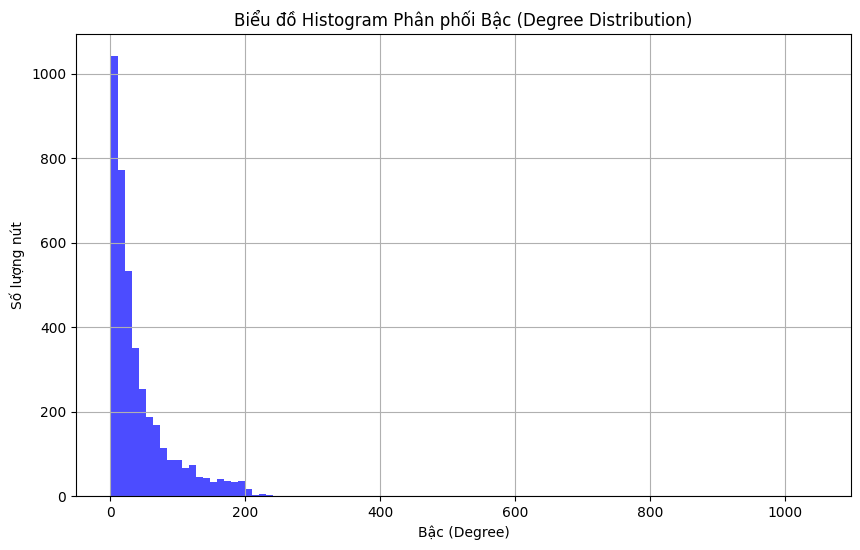

In [14]:
# 4.1. Phân phối bậc 
print("Đang tính toán phân phối bậc...")
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, alpha=0.7, color='b')
plt.title('Biểu đồ Histogram Phân phối Bậc (Degree Distribution)') 
plt.xlabel('Bậc (Degree)')
plt.ylabel('Số lượng nút')
plt.grid(True)
plt.show()

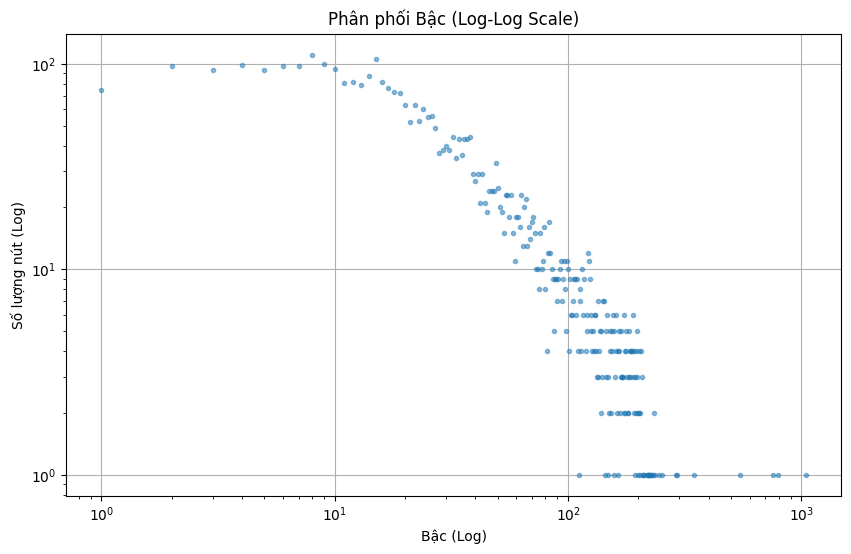

In [15]:
# Biểu đồ log-log để kiểm tra Power Law (quan trọng cho phân tích mô hình)
plt.figure(figsize=(10, 6))
degree_counts = pd.Series(degrees).value_counts().sort_index()
plt.loglog(degree_counts.index, degree_counts.values, 'o', markersize=3, alpha=0.5)
plt.title('Phân phối Bậc (Log-Log Scale)')
plt.xlabel('Bậc (Log)')
plt.ylabel('Số lượng nút (Log)')
plt.grid(True)
plt.show()

Đang tính toán hệ số phân cụm cục bộ...


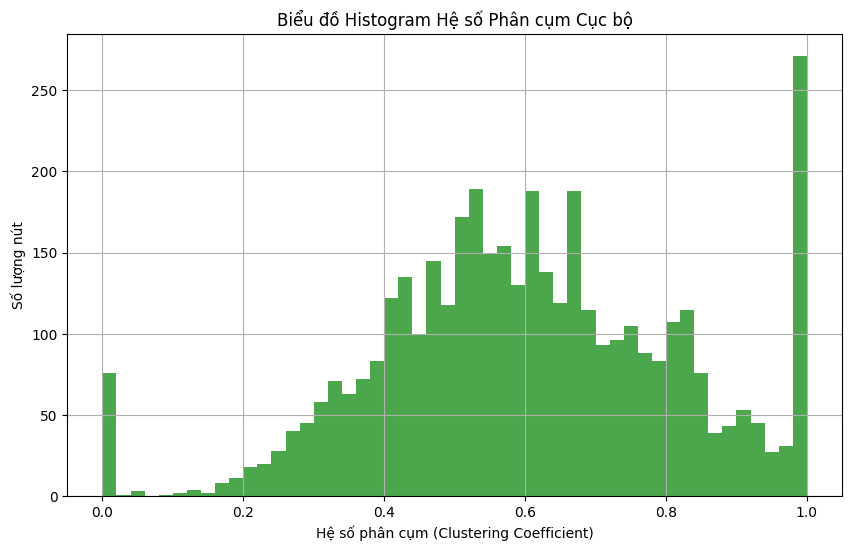

In [16]:
# 4.2. Biểu đồ hệ số phân cụm 
print("Đang tính toán hệ số phân cụm cục bộ...")
local_clustering = nx.clustering(G) # Đây là 1 dictionary {node: clustering_coeff}
clustering_values = list(local_clustering.values())

plt.figure(figsize=(10, 6))
plt.hist(clustering_values, bins=50, alpha=0.7, color='g')
plt.title('Biểu đồ Histogram Hệ số Phân cụm Cục bộ') 
plt.xlabel('Hệ số phân cụm (Clustering Coefficient)')
plt.ylabel('Số lượng nút')
plt.grid(True)
plt.show()

#### # --- Bước 5: Xuất file cho Gephi ---

In [17]:
# Chúng ta sẽ dùng đồ thị gốc (G)
# Lưu ý: Gephi có thể không xử lý tốt file quá lớn, 
# nhưng với 4k nút thì hoàn toàn ổn.
nx.write_gexf(G, "facebook_network.gexf")

print("\n--- HOÀN TẤT PHẦN 2 ---")
print("Đã xuất file 'facebook_network.gexf' để sử dụng trong Gephi.") 
print("Bạn đã có đủ thông số cho Phần 2 của báo cáo.")


--- HOÀN TẤT PHẦN 2 ---
Đã xuất file 'facebook_network.gexf' để sử dụng trong Gephi.
Bạn đã có đủ thông số cho Phần 2 của báo cáo.


## PHÂN TÍCH CẤU TRÚC MẠNG

In [18]:
# 1. Tính toán các độ đo trung tâm 
print("Đang tính Degree Centrality...")
# Bậc (Degree) thực ra đã có, nhưng chúng ta tính lại dưới dạng centrality
deg_centrality = nx.degree_centrality(G)

print("Đang tính Closeness Centrality (có thể mất chút thời gian)...")
# Dùng LCC (thành phần liên thông lớn nhất) nếu đồ thị không liên thông
# G_lcc đã được tạo ở Phần 2 nếu cần
G_to_use = G
if not nx.is_connected(G):
    print("Sử dụng Thành phần Liên thông Lớn nhất (LCC) cho Closeness...")
    largest_cc = max(nx.connected_components(G), key=len)
    G_to_use = G.subgraph(largest_cc)
    
close_centrality = nx.closeness_centrality(G_to_use)

print("Đang tính Betweenness Centrality (MẤT NHIỀU THỜI GIAN NHẤT)...")
# Ước lượng k=1000 nút để chạy nhanh hơn. 
# Nếu muốn chạy chính xác (rất chậm), dùng: nx.betweenness_centrality(G)
bet_centrality = nx.betweenness_centrality(G, k=1000, normalized=True)

print("Đang tính Eigenvector Centrality...")
try:
    eig_centrality = nx.eigenvector_centrality(G, max_iter=500)
except nx.PowerIterationFailedConvergence:
    print("Eigenvector không hội tụ, tăng max_iter và thử lại...")
    eig_centrality = nx.eigenvector_centrality(G, max_iter=1000)

print("Tính toán hoàn tất!")

# Ghi chú: PageRank/HITS thường dùng cho mạng CÓ HƯỚNG.
# Đồ thị Facebook này là KHÔNG HƯỚNG, nên 4 độ đo trên là phù hợp nhất.

Đang tính Degree Centrality...
Đang tính Closeness Centrality (có thể mất chút thời gian)...
Đang tính Betweenness Centrality (MẤT NHIỀU THỜI GIAN NHẤT)...
Đang tính Eigenvector Centrality...
Tính toán hoàn tất!


In [20]:
# 2. Tổng hợp kết quả và mô tả các nút trung tâm 
# Tạo DataFrame để dễ so sánh
df_centrality = pd.DataFrame({
    'Degree': deg_centrality,
    'Closeness': pd.Series(close_centrality), # Dùng Series vì G_to_use có thể nhỏ hơn G
    'Betweenness': bet_centrality,
    'Eigenvector': eig_centrality
})

# Điền 0 cho các nút không thuộc LCC (đối với Closeness)
df_centrality['Closeness'] = df_centrality['Closeness'].fillna(0)

print("\n--- 5 Nút Trung tâm nhất theo Từng Độ đo ---")

print("\nTop 5 theo Degree Centrality:")
print(df_centrality.sort_values('Degree', ascending=False).head(5))


--- 5 Nút Trung tâm nhất theo Từng Độ đo ---

Top 5 theo Degree Centrality:
        Degree  Closeness  Betweenness   Eigenvector
107   0.258791   0.459699     0.480614  2.606940e-04
1684  0.196137   0.393606     0.333648  7.164260e-06
1912  0.186974   0.350947     0.222429  9.540696e-02
3437  0.135463   0.314413     0.234758  9.531613e-08
0     0.085934   0.353343     0.163200  3.391796e-05


In [21]:
print("\nTop 5 theo Closeness Centrality:")
print(df_centrality.sort_values('Closeness', ascending=False).head(5))


Top 5 theo Closeness Centrality:
        Degree  Closeness  Betweenness  Eigenvector
107   0.258791   0.459699     0.480614     0.000261
58    0.002972   0.397402     0.082666     0.000590
428   0.028479   0.394837     0.065176     0.000599
563   0.022536   0.393913     0.063894     0.000601
1684  0.196137   0.393606     0.333648     0.000007


In [22]:
print("\nTop 5 theo Betweenness Centrality (Cầu nối quan trọng):")
print(df_centrality.sort_values('Betweenness', ascending=False).head(5))


Top 5 theo Betweenness Centrality (Cầu nối quan trọng):
        Degree  Closeness  Betweenness   Eigenvector
107   0.258791   0.459699     0.480614  2.606940e-04
1684  0.196137   0.393606     0.333648  7.164260e-06
3437  0.135463   0.314413     0.234758  9.531613e-08
1912  0.186974   0.350947     0.222429  9.540696e-02
0     0.085934   0.353343     0.163200  3.391796e-05


In [23]:
print("\nTop 5 theo Eigenvector Centrality (Kết nối với nút quan trọng):")
print(df_centrality.sort_values('Eigenvector', ascending=False).head(5))


Top 5 theo Eigenvector Centrality (Kết nối với nút quan trọng):
        Degree  Closeness  Betweenness  Eigenvector
1912  0.186974   0.350947     0.222429     0.095407
2266  0.057949   0.281708     0.001771     0.086983
2206  0.052006   0.263336     0.000016     0.086052
2233  0.054978   0.263543     0.000094     0.085173
2464  0.050025   0.263199     0.000009     0.084279



--- Ma trận Tương quan giữa các Độ đo ---
               Degree  Closeness  Betweenness  Eigenvector
Degree       1.000000   0.274716     0.451392     0.573532
Closeness    0.274716   1.000000     0.137886    -0.078656
Betweenness  0.451392   0.137886     1.000000     0.018738
Eigenvector  0.573532  -0.078656     0.018738     1.000000


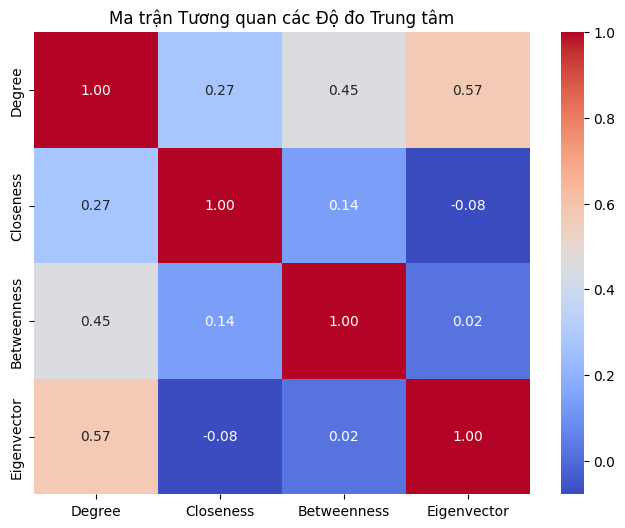

In [24]:
# 3. So sánh tương quan của các độ đo 
print("\n--- Ma trận Tương quan giữa các Độ đo ---")
correlation_matrix = df_centrality.corr()
print(correlation_matrix)

# Trực quan hóa ma trận tương quan (cần cài seaborn)
try:
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Ma trận Tương quan các Độ đo Trung tâm') 
    plt.show()
except ImportError:
    print("\n(Cài thư viện 'seaborn' bằng %pip install seaborn để vẽ heatmap)")

## PHÂN TÍCH CỘNG ĐỒNG TRONG MẠNG

#### --- 1. Phân tích K-Core ---

In [26]:
print("Đang phân tích K-Core...") 
# Tạo một bản sao của G để thực hiện phân rã k-core
G_core = G.copy()
# Tìm k-core. Thao tác này sẽ xóa các nút không thuộc lõi.
# Chúng ta sẽ tìm lõi chính (lõi có bậc k lớn nhất)
core_number = nx.core_number(G_core) # Tính core number cho mọi nút
# Gán core number làm thuộc tính nút
nx.set_node_attributes(G_core, core_number, 'core_number')

Đang phân tích K-Core...


In [27]:
# Tìm k-lõi lớn nhất
max_k = max(core_number.values())
print(f"Giá trị K-lõi lớn nhất (Main Core k): {max_k}")

Giá trị K-lõi lớn nhất (Main Core k): 115


In [28]:
# Tạo đồ thị k-lõi chính
main_core = nx.k_core(G_core, k=max_k)
print(f"Số nút trong lõi chính (k={max_k}): {main_core.number_of_nodes()}")
print(f"Số cạnh trong lõi chính (k={max_k}): {main_core.number_of_edges()}")

Số nút trong lõi chính (k=115): 158
Số cạnh trong lõi chính (k=115): 11144


#### --- 2. Phát hiện Cộng đồng (dùng thuật toán Louvain) ---

In [29]:
print("\nĐang phát hiện cộng đồng (Thuật toán Louvain)...") 
# Thuật toán Louvain tìm các phân vùng tối ưu hóa modularity
# Kết quả trả về là một danh sách các set (mỗi set là một cộng đồng)
communities = nx_comm.louvain_communities(G, seed=123)

print(f"Tìm thấy tổng cộng {len(communities)} cộng đồng.")


Đang phát hiện cộng đồng (Thuật toán Louvain)...
Tìm thấy tổng cộng 16 cộng đồng.


#### --- 3. Đánh giá chất lượng (Tính Mô-đun) ---

In [30]:
# Tính toán Modularity 
modularity_score = nx_comm.modularity(G, communities)
print(f"Chỉ số Modularity của các cộng đồng: {modularity_score:.4f}")

Chỉ số Modularity của các cộng đồng: 0.8349


#### --- 4. Gán thuộc tính Cộng đồng vào Đồ thị ---

In [31]:
# Chúng ta cần gán ID cộng đồng cho mỗi nút để dùng trong Gephi 
# Tạo một dictionary {node: community_id}
community_dict = {}
for i, comm_set in enumerate(communities):
    for node in comm_set:
        community_dict[node] = i # i chính là ID của cộng đồng

In [32]:
# Gán thuộc tính 'community' này vào đồ thị G ban đầu
nx.set_node_attributes(G, community_dict, 'community')

print("Đã gán ID cộng đồng cho từng nút.")

Đã gán ID cộng đồng cho từng nút.


#### --- 5. Xuất lại file Gephi (ĐÃ CẬP NHẬT CỘNG ĐỒNG) ---

In [33]:
# Đây là bước quan trọng để trực quan hóa 
nx.write_gexf(G, "facebook_network_with_communities.gexf")